In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import DBSCAN
from numpy import unique, where
import matplotlib.pyplot as plt

import os
os.chdir('../../')

from modules import preproc
from modules.join_data import join_y
from modules import feature_eng
from modules import cluster_intelligence
from modules.evaluate_model import get_eval_scores
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows',150)
pd.set_option('display.max_columns',1000)

In [ ]:
print(os.getcwd())

## Reading in data and preproc

In [2]:
# laptops
laptops = pd.read_json('full_data/laptops.json')
laptops = join_y(laptops, 'raw_data/laptops_sales.csv')
laptops = preproc.clean_cols(laptops)
laptops = preproc.fill_empty_lists(laptops)
laptops = preproc.preprocess_reviews(laptops)
laptops = feature_eng.generate_features(laptops)
laptops = feature_eng.do_PCA(laptops)
laptops['TOTAL_SALES_QBINNED'] = pd.qcut(laptops['TOTAL_SALES'], 3, labels=[0,1,2])

# phones
phones = pd.read_json('full_data/smartphones.json')
phones = join_y(phones, 'raw_data/phone_sales.csv')
phones = preproc.clean_cols(phones)
phones = preproc.fill_empty_lists(phones)
phones = preproc.preprocess_reviews(phones)
phones = feature_eng.generate_features(phones)
phones = feature_eng.do_PCA(phones)
phones['TOTAL_SALES_QBINNED'] = pd.qcut(phones['TOTAL_SALES'], 3, labels=[0,1,2])
# desktops
desktops = pd.read_json('full_data/desktops.json')
desktops = join_y(desktops, 'raw_data/desktops_sales.csv')
desktops = preproc.clean_cols(desktops)
desktops = preproc.fill_empty_lists(desktops)
desktops = preproc.preprocess_reviews(desktops)
desktops = feature_eng.generate_features(desktops)
desktops = feature_eng.do_PCA(desktops)
desktops['TOTAL_SALES_QBINNED'] = pd.qcut(desktops['TOTAL_SALES'], 3, labels=[0,1,2])
# tablets
tablets = pd.read_json('full_data/tablets.json')
tablets = join_y(tablets, 'raw_data/tablet_sales.csv')
tablets = tablets[tablets['no_reviews'].notna()]
tablets = preproc.clean_cols(tablets)
tablets = preproc.fill_empty_lists(tablets)
tablets = preproc.preprocess_reviews(tablets)
tablets = feature_eng.generate_features(tablets)
tablets = feature_eng.do_PCA(tablets)
tablets['TOTAL_SALES_QBINNED'] = pd.qcut(tablets['TOTAL_SALES'], 3, labels=[0,1,2])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rory\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]    

# Distributions

In [ ]:
f, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(laptops['price'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Laptops')
sns.histplot(phones['price'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Phones')
sns.histplot(desktops['price'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Desktops')
sns.histplot(tablets['price'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Tablets')

In [ ]:
f, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(laptops['TOTAL_SALES'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Laptops')
sns.histplot(phones['TOTAL_SALES'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Phones')
sns.histplot(desktops['TOTAL_SALES'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Desktops')
sns.histplot(tablets['TOTAL_SALES'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Tablets')

In [ ]:
f, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(laptops['no_reviews'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Laptops')
sns.histplot(phones['no_reviews'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Phones')
sns.histplot(desktops['no_reviews'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Desktops')
sns.histplot(tablets['no_reviews'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Tablets')
#plt.tight_layout()

In [ ]:

f, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(laptops['Rvol/%rec'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Laptops')
sns.histplot(phones['Rvol/%rec'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Phones')
sns.histplot(desktops['Rvol/%rec'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Desktops')
sns.histplot(tablets['Rvol/%rec'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Tablets')

In [ ]:
f, axes = plt.subplots(2,2, figsize=(15,15))
sns.histplot(laptops['pos_reviews'].dropna(), ax=axes[0,0])
axes[0,0].set_title('Laptops')
sns.histplot(phones['pos_reviews'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Phones')
sns.histplot(desktops['pos_reviews'].dropna(), ax=axes[1,0])
axes[1,0].set_title('Desktops')
sns.histplot(tablets['pos_reviews'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Tablets')

## Scaling

In [3]:
lX = laptops
pX = phones
tX = tablets
dX = desktops

In [4]:
lX = lX.select_dtypes(include=['float', 'int64','int32'])
lX['price/Rvol'] = lX['price/Rvol'].replace(np.inf, lX['price/Rvol'].median())
lX = (lX-lX.mean())/lX.std()

In [5]:
pX = pX.select_dtypes(include=['float', 'int64','int32'])
pX['price/Rvol'] = pX['price/Rvol'].replace(np.inf, pX['price/Rvol'].median())
pX = (pX-pX.mean())/pX.std()

In [6]:
tX = tX.select_dtypes(include=['float', 'int64','int32'])
tX['price/Rvol'] = tX['price/Rvol'].replace(np.inf, tX['price/Rvol'].median())
tX = (tX-tX.mean())/tX.std()

In [7]:
dX = dX.select_dtypes(include=['float', 'int64','int32'])
dX['price/Rvol'] = dX['price/Rvol'].replace(np.inf, dX['price/Rvol'].median())
dX = (dX-dX.mean())/dX.std()

In [8]:
def evaluate_clusters(
    predicted_y,
    real_y,
    qbinned_y,
 
):
    """Evaluates clustering results, uses silouette and rand if specified. Cannot be used with DBSCAN"""
    f, axes = plt.subplots(2,1, figsize=(10,15))
    sns.kdeplot(predicted_y, real_y.astype(int), shade=True,shade_lowest=True,cbar=True, ax=axes[0])
    axes[0].set_title('Cluster labels with total sales')
    sns.kdeplot(predicted_y, qbinned_y.astype(int), shade=True, shade_lowest=True, cbar=True, ax=axes[1])
    axes[1].set_title('Cluster labels with quantile binned sales')

## TOP 3 features

## laptops

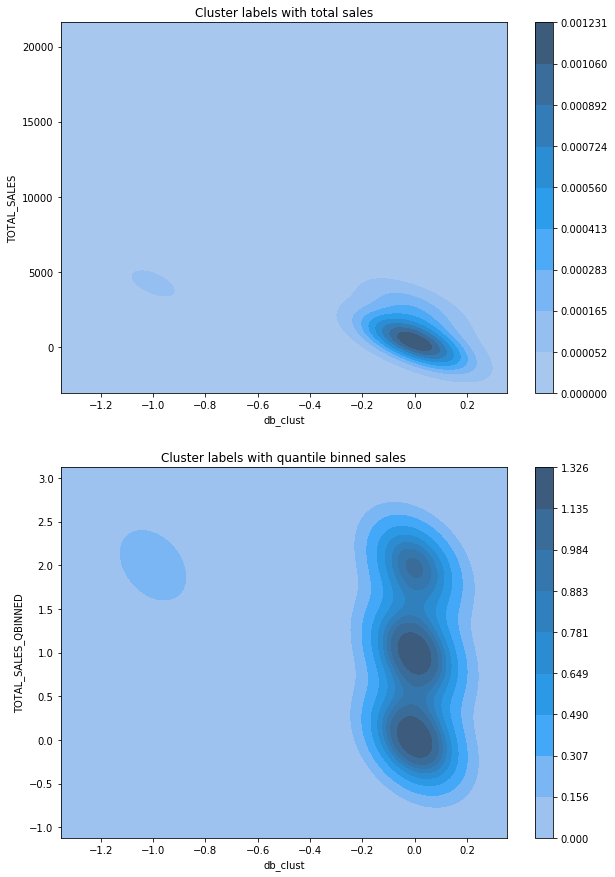

In [9]:
lX['Rvol/%rec'] = lX['Rvol/%rec'].replace(np.nan, lX['Rvol/%rec'].median())
dbscan_model = DBSCAN(eps=0.8, min_samples=(len(lX))/4)
db_clust = dbscan_model.fit_predict(lX[['no_reviews','Rvol/%rec','pos_reviews']])
laptops['db_clust'] = pd.Series(db_clust, index=laptops.index)
evaluate_clusters(laptops['db_clust'] ,laptops['TOTAL_SALES'],  laptops['TOTAL_SALES_QBINNED'])

In [10]:
cluster_intelligence.cluster_report(lX[['no_reviews','Rvol/%rec','pos_reviews']],db_clust)

,class_name,instance_count,rule_list
1,-1,8,NaN
0,0,104,[1.0] (pos_reviews <= -0.20513731241226196)[0.84] (pos_reviews > -0.20513731241226196)


In [11]:
get_eval_scores(laptops['y_true'], laptops['db_clust'])

The precision score is: 0.875 and the recall is 0.875


{0.875}

In [12]:
print(laptops.loc[laptops.db_clust==-1]['TOTAL_SALES'].mean())
print(laptops.loc[laptops.db_clust==-0]['TOTAL_SALES'].mean())

6777.25
853.3557692307693


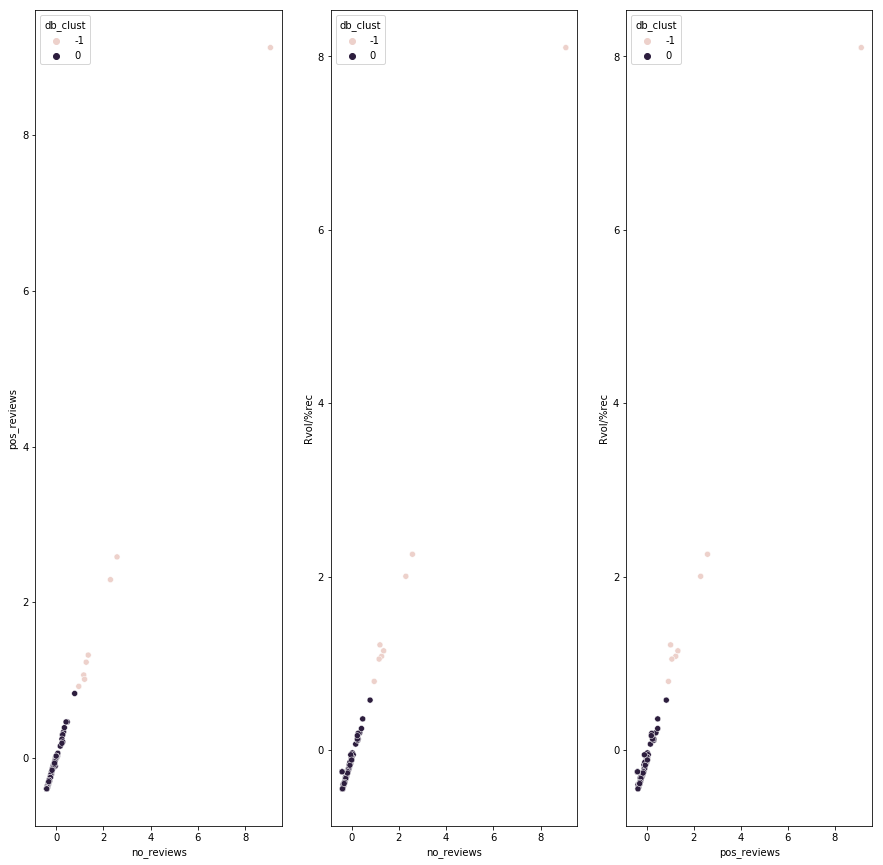

In [13]:
lX['db_clust'] = pd.Series(db_clust, index=lX.index)
f, axes = plt.subplots(1,3, figsize=(15,15))
sns.scatterplot(x=lX['no_reviews'], y=lX['pos_reviews'], hue=lX['db_clust'],ax=axes[0])
sns.scatterplot(x=lX['no_reviews'], y=lX['Rvol/%rec'],hue=lX['db_clust'], ax=axes[1])
sns.scatterplot(x=lX['pos_reviews'], y=lX['Rvol/%rec'],hue=lX['db_clust'], ax=axes[2])

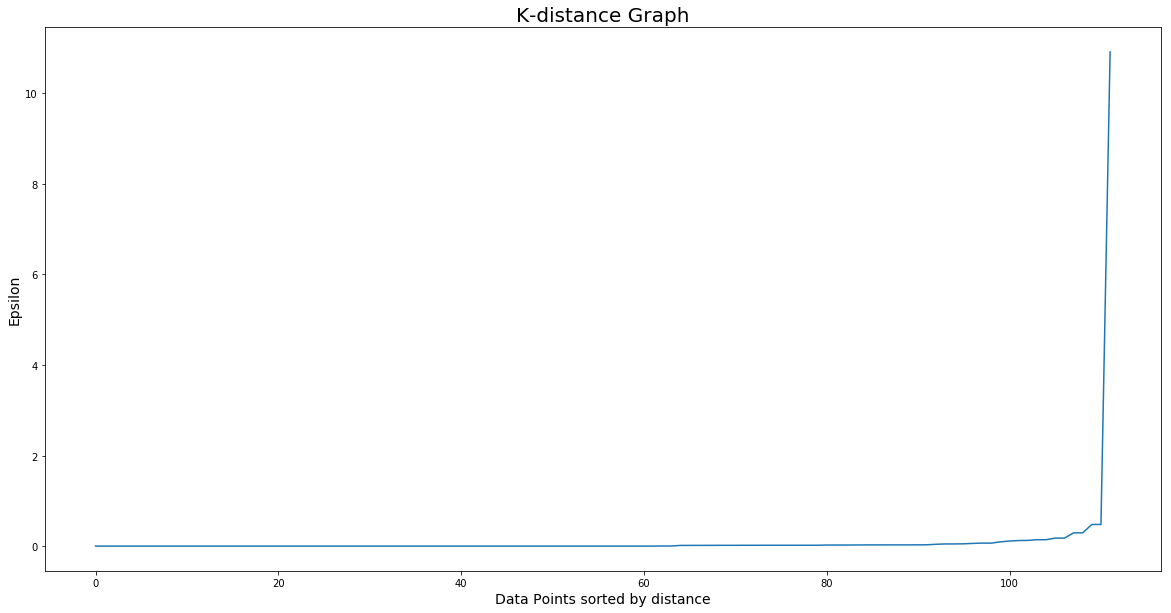

In [14]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(lX[['no_reviews','Rvol/%rec','pos_reviews']])
distances, indices = nbrs.kneighbors(lX[['no_reviews','Rvol/%rec','pos_reviews']])

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

## phones

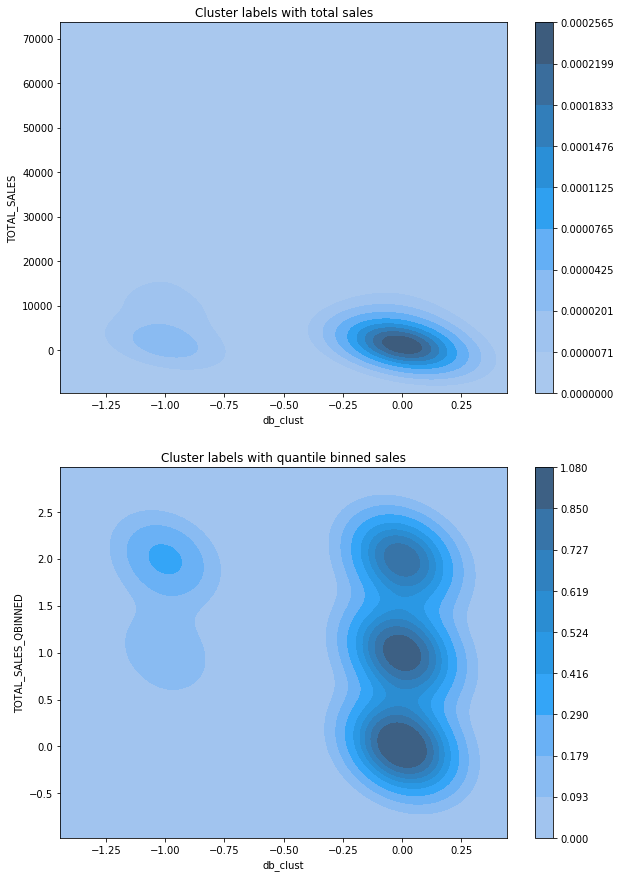

In [15]:
pX['Rvol/%rec'] = pX['Rvol/%rec'].replace(np.nan, pX['Rvol/%rec'].median())
dbscan_model = DBSCAN(eps=1, min_samples=(len(pX))/4)
db_clust = dbscan_model.fit_predict(pX[['no_reviews','Rvol/%rec','pos_reviews']])
phones['db_clust'] = pd.Series(db_clust, index=phones.index)
evaluate_clusters(phones['db_clust'] ,phones['TOTAL_SALES'],  phones['TOTAL_SALES_QBINNED'])

In [16]:
cluster_intelligence.cluster_report(pX[['no_reviews','Rvol/%rec','pos_reviews']],db_clust)

,class_name,instance_count,rule_list
1,-1,42,[0.84] (pos_reviews > 0.4751226007938385)
0,0,213,[1.0] (pos_reviews <= 0.4751226007938385)


In [17]:
get_eval_scores(phones['y_true'], phones['db_clust'])

The precision score is: 0.2619047619047619 and the recall is 0.6111111111111112


{0.2619047619047619, 0.6111111111111112}

In [18]:
print(phones.loc[phones.db_clust==-1]['TOTAL_SALES'].mean())
print(phones.loc[phones.db_clust==-0]['TOTAL_SALES'].mean())

10697.452380952382
2301.089201877934


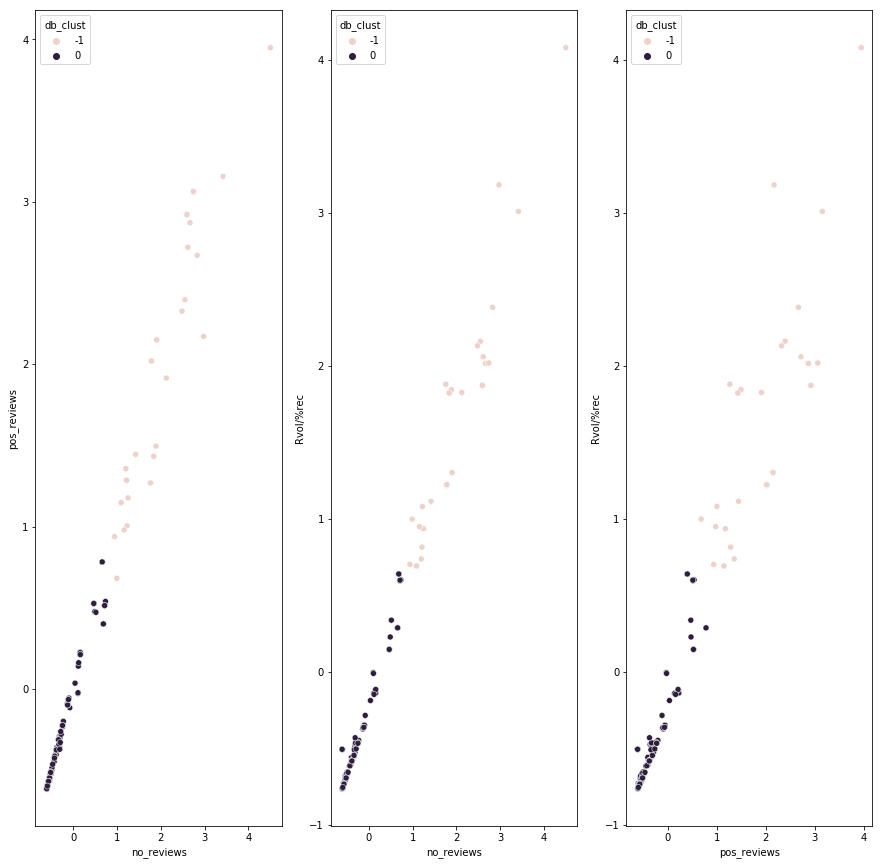

In [19]:
pX['db_clust'] = pd.Series(db_clust, index=pX.index)
f, axes = plt.subplots(1,3, figsize=(15,15))
sns.scatterplot(x=pX['no_reviews'], y=pX['pos_reviews'], hue=pX['db_clust'],ax=axes[0])
sns.scatterplot(x=pX['no_reviews'], y=pX['Rvol/%rec'],hue=pX['db_clust'], ax=axes[1])
sns.scatterplot(x=pX['pos_reviews'], y=pX['Rvol/%rec'],hue=pX['db_clust'], ax=axes[2])

## desktops

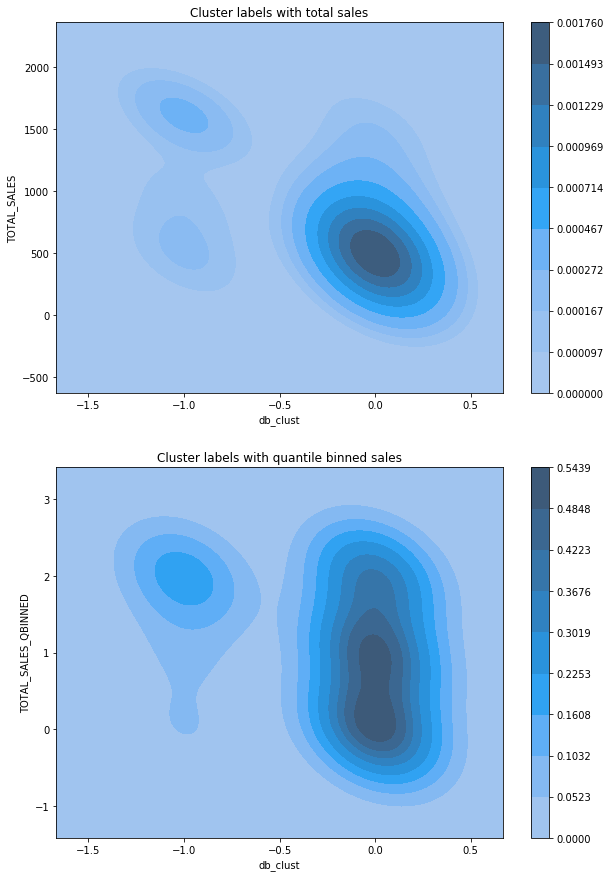

In [20]:
dX['Rvol/%rec'] = dX['Rvol/%rec'].replace(np.nan, dX['Rvol/%rec'].median())
dbscan_model = DBSCAN(eps=1, min_samples=(len(dX))/4)
db_clust = dbscan_model.fit_predict(dX[['no_reviews','Rvol/%rec','pos_reviews']])
desktops['db_clust'] = pd.Series(db_clust, index=desktops.index)
evaluate_clusters(desktops['db_clust'] ,desktops['TOTAL_SALES'],  desktops['TOTAL_SALES_QBINNED'])

In [21]:
cluster_intelligence.cluster_report(dX[['no_reviews','Rvol/%rec','pos_reviews']],db_clust)

,class_name,instance_count,rule_list
1,-1,6,NaN
0,0,26,[0.8125] ALL


In [22]:
get_eval_scores(desktops['y_true'], desktops['db_clust'])

The precision score is: 0.5 and the recall is 0.6


{0.5, 0.6}

In [23]:
print(desktops.loc[desktops.db_clust==-1]['TOTAL_SALES'].mean())
print(desktops.loc[desktops.db_clust==-0]['TOTAL_SALES'].mean())

1135.5
592.1923076923077


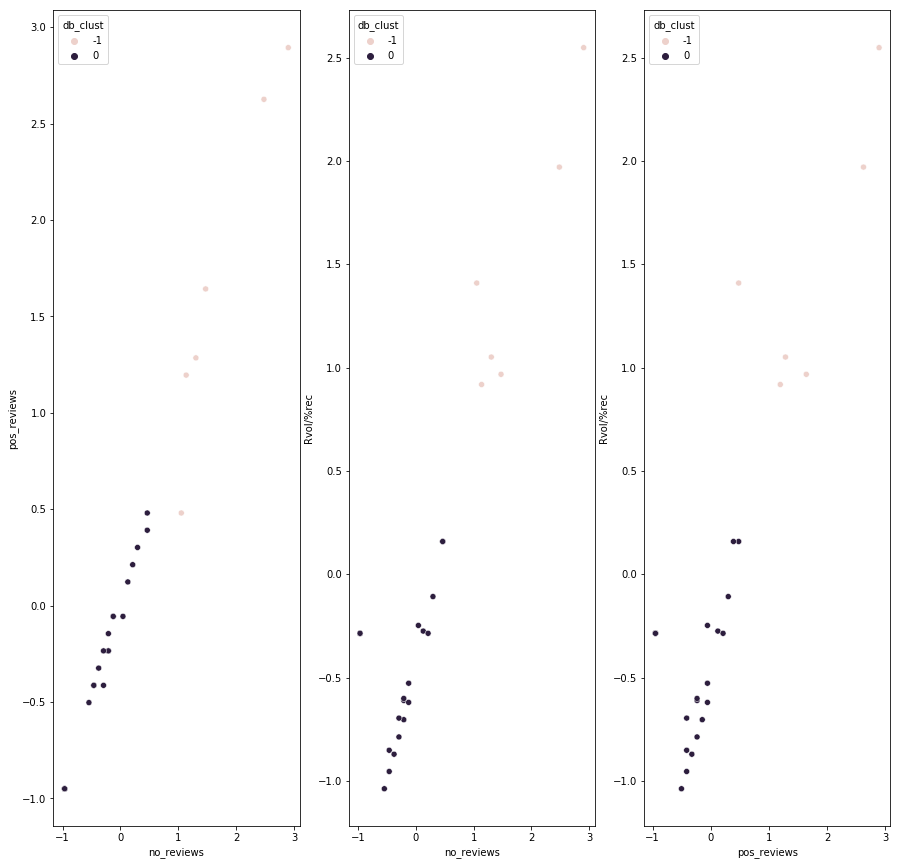

In [24]:
dX['db_clust'] = pd.Series(db_clust, index=dX.index)
f, axes = plt.subplots(1,3, figsize=(15,15))
sns.scatterplot(x=dX['no_reviews'], y=dX['pos_reviews'], hue=dX['db_clust'],ax=axes[0])
sns.scatterplot(x=dX['no_reviews'], y=dX['Rvol/%rec'],hue=dX['db_clust'], ax=axes[1])
sns.scatterplot(x=dX['pos_reviews'], y=dX['Rvol/%rec'],hue=dX['db_clust'], ax=axes[2])

## tablets

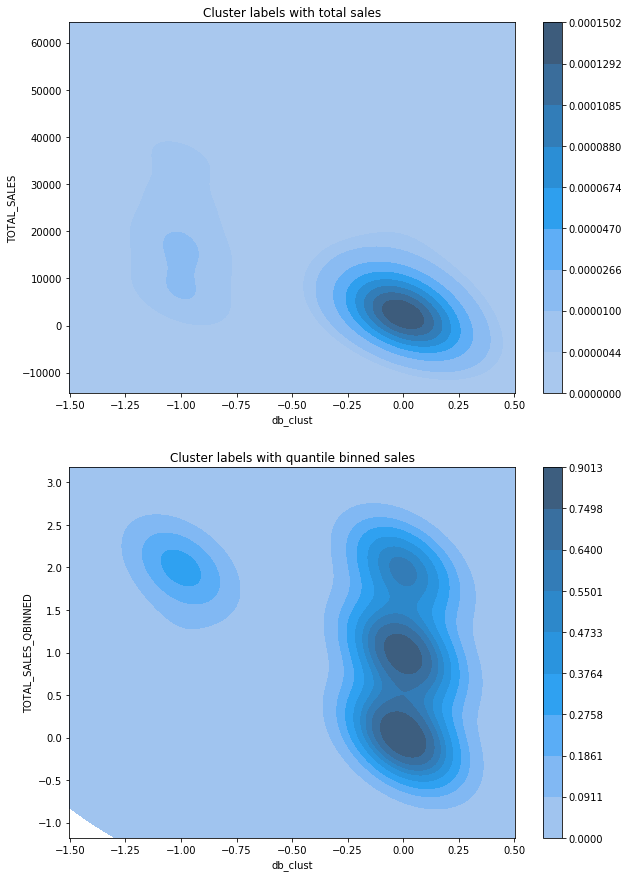

In [25]:
tX['Rvol/%rec'] = tX['Rvol/%rec'].replace(np.nan, tX['Rvol/%rec'].median())
dbscan_model = DBSCAN(eps=1, min_samples=(len(tX))/4)
db_clust = dbscan_model.fit_predict(tX[['no_reviews','Rvol/%rec','pos_reviews']])
tablets['db_clust'] = pd.Series(db_clust, index=tablets.index)
evaluate_clusters(tablets['db_clust'] ,tablets['TOTAL_SALES'],  tablets['TOTAL_SALES_QBINNED'])

In [26]:
cluster_intelligence.cluster_report(tX[['no_reviews','Rvol/%rec','pos_reviews']],db_clust)

,class_name,instance_count,rule_list
1,-1,12,NaN
0,0,72,[0.8571428571428571] ALL


In [27]:
get_eval_scores(tablets['y_true'], tablets['db_clust'])

The precision score is: 0.5833333333333334 and the recall is 0.6363636363636364


{0.5833333333333334, 0.6363636363636364}

In [28]:
print(tablets.loc[tablets.db_clust==-1]['TOTAL_SALES'].mean())
print(tablets.loc[tablets.db_clust==-0]['TOTAL_SALES'].mean())

18316.666666666668
4783.958333333333


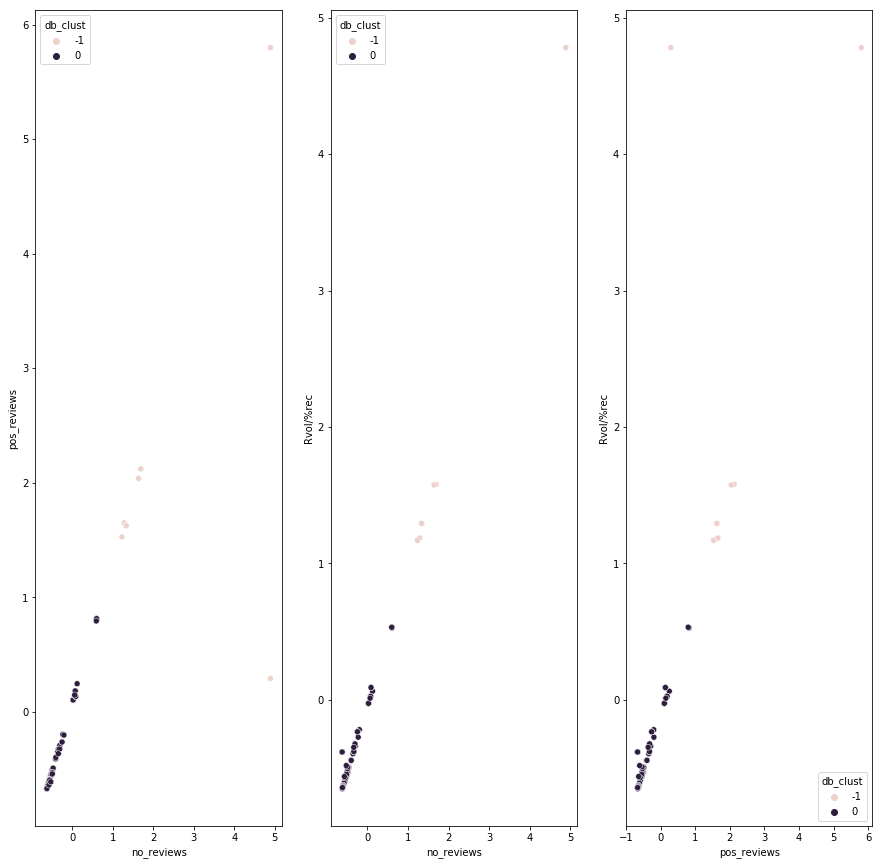

In [29]:
tX['db_clust'] = pd.Series(db_clust, index=tX.index)
f, axes = plt.subplots(1,3, figsize=(15,15))
sns.scatterplot(x=tX['no_reviews'], y=tX['pos_reviews'], hue=tX['db_clust'],ax=axes[0])
sns.scatterplot(x=tX['no_reviews'], y=tX['Rvol/%rec'],hue=tX['db_clust'], ax=axes[1])
sns.scatterplot(x=tX['pos_reviews'], y=tX['Rvol/%rec'],hue=tX['db_clust'], ax=axes[2])